# Collaboration and Competition

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the third project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Tennis.app"`
- **Windows** (x86): `"path/to/Tennis_Windows_x86/Tennis.exe"`
- **Windows** (x86_64): `"path/to/Tennis_Windows_x86_64/Tennis.exe"`
- **Linux** (x86): `"path/to/Tennis_Linux/Tennis.x86"`
- **Linux** (x86_64): `"path/to/Tennis_Linux/Tennis.x86_64"`
- **Linux** (x86, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86"`
- **Linux** (x86_64, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86_64"`

For instance, if you are using a Mac, then you downloaded `Tennis.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Tennis.app")
```

In [2]:
env = UnityEnvironment(file_name="Tennis_Windows_x86_64/Tennis.exe")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, two agents control rackets to bounce a ball over a net. If an agent hits the ball over the net, it receives a reward of +0.1.  If an agent lets a ball hit the ground or hits the ball out of bounds, it receives a reward of -0.01.  Thus, the goal of each agent is to keep the ball in play.

The observation space consists of 8 variables corresponding to the position and velocity of the ball and racket. Two continuous actions are available, corresponding to movement toward (or away from) the net, and jumping. 

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -6.65278625 -1.5
 -0.          0.          6.83172083  6.         -0.          0.        ]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agents and receive feedback from the environment.

Once this cell is executed, you will watch the agents' performance, if they select actions at random with each time step.  A window should pop up that allows you to observe the agents.

Of course, as part of the project, you'll have to change the code so that the agents are able to use their experiences to gradually choose better actions when interacting with the environment!

In [112]:
for i in range(1, 3):                                      # play game for 5 episodes
    env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
    states = env_info.vector_observations                  # get the current state (for each agent)
    scores = np.zeros(num_agents)                          # initialize the score (for each agent)
    while True:
        actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
        actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
        env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        next_states = env_info.vector_observations         # get next state (for each agent)
        rewards = env_info.rewards                         # get reward (for each agent)
        dones = env_info.local_done                        # see if episode finished
        scores += env_info.rewards                         # update the score (for each agent)
        states = next_states                               # roll over states to next time step
        print(rewards)
        
        if np.any(dones):                                  # exit loop if episode finished
            break
    print('Score (max over agents) from episode {}: {}'.format(i, np.max(scores)))

[0.0, 0.0]
[0.0, 0.0]
[0.0, 0.0]
[0.0, 0.0]
[0.0, 0.0]
[0.0, 0.0]
[0.0, 0.0]
[0.0, 0.0]
[0.0, 0.0]
[0.0, 0.0]
[0.0, 0.0]
[0.0, 0.0]
[0.0, -0.009999999776482582]
Score (max over agents) from episode 1: 0.0
[0.0, 0.0]
[0.0, 0.0]
[0.0, 0.0]
[0.0, 0.0]
[0.0, 0.0]
[0.0, 0.0]
[0.0, 0.0]
[0.0, 0.0]
[0.0, 0.0]
[0.0, 0.0]
[0.0, 0.0]
[0.0, 0.0]
[0.0, 0.0]
[0.0, 0.0]
[0.0, 0.0]
[0.0, 0.0]
[0.10000000149011612, 0.0]
[0.0, 0.0]
[0.0, 0.0]
[0.0, 0.0]
[0.0, 0.0]
[0.0, 0.0]
[0.0, 0.0]
[0.0, 0.0]
[0.0, 0.0]
[0.0, 0.0]
[0.0, 0.0]
[0.0, 0.0]
[0.0, 0.0]
[0.0, 0.0]
[0.0, 0.0]
[0.0, 0.0]
[0.0, 0.0]
[0.0, 0.0]
[0.0, 0.0]
[0.0, 0.0]
[0.0, 0.0]
[0.0, 0.0]
[0.0, 0.0]
[0.0, 0.0]
[0.0, 0.0]
[0.0, 0.10000000149011612]
[0.0, 0.0]
[0.0, 0.0]
[0.0, 0.0]
[0.0, 0.0]
[0.0, 0.0]
[0.0, 0.0]
[0.0, 0.0]
[0.0, 0.0]
[0.0, 0.0]
[0.0, 0.0]
[-0.009999999776482582, 0.0]
Score (max over agents) from episode 2: 0.10000000149011612


When finished, you can close the environment.

In [ ]:
env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

In [5]:
import numpy as np

import torch
import torch.nn as nn
import torch.nn.functional as F

def hidden_init(layer):
    fan_in = layer.weight.data.size()[0]
    lim = 1. / np.sqrt(fan_in)
    return (-lim, lim)

class Actor(nn.Module):
    """Actor (Policy) Model."""

    def __init__(self, state_size, action_size, seed):

        super(Actor, self).__init__()
        self.seed = torch.manual_seed(seed)

        self.bn0 = nn.BatchNorm1d(state_size)
        self.fc1 = nn.Linear(state_size, 128)
        self.bn1 = nn.BatchNorm1d(128)
        self.fc2 = nn.Linear(128, 64)
        self.bn2 = nn.BatchNorm1d(64)
        self.fc3 = nn.Linear(64, 32)
        self.bn3 = nn.BatchNorm1d(32)
        self.fc4 = nn.Linear(32, action_size)


    def forward(self, state):
        """Build an actor (policy) network that maps states -> actions."""
        if state.dim() == 1:
            state = torch.unsqueeze(state,0)
        x = self.bn0(state)
        x = F.selu(self.bn1(self.fc1(x)))
        x = F.selu(self.bn2(self.fc2(x)))
        x = F.selu(self.bn3(self.fc3(x)))
        return torch.tanh(self.fc4(x))

class Critic(nn.Module):
    def __init__(self, state_size, action_size, seed):

        super(Critic, self).__init__()
        self.seed = torch.manual_seed(seed)
        
        self.bn0 = nn.BatchNorm1d(state_size)
        self.fcs1 = nn.Linear(state_size, 128)
        self.fc2 = nn.Linear(128 + action_size, 64)
        self.fc3 = nn.Linear(64, 32)
        self.fc4 = nn.Linear(32, 16)
        self.fc5 = nn.Linear(16, 1)
        




    def forward(self, state, action):
        if state.dim() == 1:
            state = torch.unsqueeze(state,0)
        state = self.bn0(state)
        x_state = F.selu(self.fcs1(state))
        x = torch.cat((x_state, action), dim=1)
        x = F.selu(self.fc2(x))
        x = F.selu(self.fc3(x))
        x = F.selu(self.fc4(x))
        return  F.selu(self.fc5(x))   #torch.tanh()

In [9]:
import numpy as np
import random
import copy
from collections import namedtuple, deque


import torch
import torch.nn.functional as F
import torch.optim as optim


GAMMA = 0.99            # discount factor
TAU = 1e-3              # for soft update of target parameters
LR_ACTOR = 1e-4         # learning rate of the actor 
LR_CRITIC = 1e-3        # learning rate of the critic
WEIGHT_DECAY = 0.00     # L2 weight decay
BATCH_SIZE = 128         # minibatch size  128
BUFFER_SIZE = int(1e5)  # replay buffer size

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

class Agent():
    """Interacts with and learns from the environment."""
    
    def __init__(self, state_size, action_size, random_seed):
        """Initialize an Agent object.
        
        Params
        ======
            state_size (int): dimension of each state
            action_size (int): dimension of each action
            random_seed (int): random seed
        """
        self.state_size = state_size
        self.action_size = action_size
        self.seed = random.seed(random_seed)
        
        # Actor Network (w/ Target Network)
        self.actor_local = Actor(state_size, action_size, random_seed).to(device)
        self.actor_target = Actor(state_size, action_size, random_seed).to(device)
        self.actor_optimizer = optim.Adam(self.actor_local.parameters(), lr=LR_ACTOR)
        
        self.scheduler_Actor = torch.optim.lr_scheduler.StepLR(self.actor_optimizer,step_size=50, gamma=0.1)

        # Critic Network (w/ Target Network)
        self.critic_local = Critic(state_size, action_size, random_seed).to(device)
        self.critic_target = Critic(state_size, action_size, random_seed).to(device)
        self.critic_optimizer = optim.Adam(self.critic_local.parameters(), lr=LR_CRITIC, weight_decay=WEIGHT_DECAY)
        
        self.scheduler_Critic = torch.optim.lr_scheduler.StepLR(self.critic_optimizer,step_size=50, gamma=0.1)

        
        self.deep_copy(self.actor_target, self.actor_local)
        self.deep_copy(self.critic_target, self.critic_local)
        self.num_agents=2
        # Noise process
        self.noise = OUNoise((self.num_agents, action_size), random_seed)
        
        self.actor_losses=[]
        self.critic_losses=[]
        
        self.epsilon=1
        
        # Replay memory
        self.memory = ReplayBuffer(BUFFER_SIZE)
    
    def step(self, state, action, reward, next_state, done):
        self.actor_target.eval()
        self.critic_target.eval()
        self.critic_local.eval()
        
        """Save experience in replay memory, and use random sample from buffer to learn."""
        statee = torch.from_numpy(state).float().to(device).unsqueeze(0)
        next_statee = torch.from_numpy(next_state).float().to(device).unsqueeze(0)
        actionn = torch.from_numpy(action).float().to(device).unsqueeze(0)
        
        with torch.no_grad():
            action_next = self.actor_target(next_statee).cpu().data.numpy()
            action_next = torch.from_numpy(action_next).float().to(device)
            Q_targets_next = self.critic_target(next_statee, action_next).squeeze(0).detach().numpy()[0]
            Q_targets = reward/0.1 + (GAMMA * Q_targets_next * (1 - int(done)))
            Q_expected = self.critic_local(statee, actionn).squeeze(0).detach().numpy()[0]
        error=abs(abs(Q_expected)-abs(Q_targets))
        
        self.memory.push(error, state, action, reward, next_state, done)
        self.actor_target.train()
        self.critic_target.train()
        self.critic_local.train()
        
        
    def act(self, states, add_noise=True):
        """Returns actions for given state as per current policy."""
        states = torch.from_numpy(states).float().to(device)
        actions = np.zeros((self.num_agents, self.action_size))
        self.actor_local.eval()
        with torch.no_grad():
            for agent_num, state in enumerate(states):
                action = self.actor_local(state).cpu().data.numpy()
                actions[agent_num, :] = action
        self.actor_local.train()
        if add_noise:
            actions += self.noise.sample()
            #return np.clip(action, -1, 1)
            if np.random.uniform(0, high=1) < self.epsilon:
                actions= np.array([np.random.uniform(-1, high=1,size=2),np.random.uniform(-1, high=1,size=2)])
                
        return np.clip(actions, -1, 1)

    def reset(self):
        self.noise.reset()

    def start_learn(self):
        if self.memory.__len__() > BATCH_SIZE:
            self.learn( GAMMA)
        
    def learn(self, gamma):
        """Update policy and value parameters using given batch of experience tuples.
        Q_targets = r + γ * critic_target(next_state, actor_target(next_state))
        where:
            actor_target(state) -> action
            critic_target(state, action) -> Q-value
        Params
        ======
            experiences (Tuple[torch.Tensor]): tuple of (s, a, r, s', done) tuples 
            gamma (float): discount factor
        """
        states, actions, rewards, next_states, dones, idxs, is_weights= self.memory.sample(BATCH_SIZE)
                
        states = torch.from_numpy(states).float().to(device)
        actions = torch.from_numpy(actions).float().to(device)
        rewards = torch.from_numpy(rewards).float().to(device)
        next_states = torch.from_numpy(next_states).float().to(device)
        dones = torch.from_numpy(dones.astype(np.uint8)).float().to(device)


        # ---------------------------- update critic ---------------------------- #
        # Get predicted next-state actions and Q values from target models
        actions_next = self.actor_target(next_states)
        Q_targets_next = self.critic_target(next_states, actions_next)
        # Compute Q targets for current states (y_i)
        Q_targets = rewards + (gamma * Q_targets_next * (1 - dones))
        # Compute critic loss
        Q_expected = self.critic_local(states, actions)
        critic_loss = (torch.FloatTensor(is_weights)*F.mse_loss(Q_expected, Q_targets)).mean()
        #print(rewards.detach().numpy().reshape(1,-1))
        #print(Q_expected.detach().numpy().reshape(1,-1))
        #print(Q_targets.detach().numpy().reshape(1,-1))
   
        # Minimize the loss
        self.critic_optimizer.zero_grad()
        critic_loss.backward()
        torch.nn.utils.clip_grad_norm(self.critic_local.parameters(), 1)
        self.critic_optimizer.step()
        #self.scheduler_Critic.step()
        
        errors=abs(abs(Q_expected.detach())-abs(Q_targets.detach()))
        self.memory.update_priorities(idxs, errors)

        # ---------------------------- update actor ---------------------------- #
        # Compute actor loss
        actions_pred = self.actor_local(states)
        actor_loss = -(self.critic_local(states, actions_pred)).mean()
        # Minimize the loss
        self.actor_optimizer.zero_grad()
        actor_loss.backward()
        self.actor_optimizer.step()
        #self.scheduler_Actor.step()

        self.actor_losses.append(actor_loss.detach())
        self.critic_losses.append(critic_loss.detach())
            
                   

    def soft_update(self, local_model, target_model, tau):
        """Soft update model parameters.
        θ_target = τ*θ_local + (1 - τ)*θ_target
        Params
        ======
            local_model: PyTorch model (weights will be copied from)
            target_model: PyTorch model (weights will be copied to)
            tau (float): interpolation parameter 
        """
        for target_param, local_param in zip(target_model.parameters(), local_model.parameters()):
            target_param.data.copy_(tau*local_param.data + (1.0-tau)*target_param.data)
            
    def deep_copy(self, target, source):
        for target_param, param in zip(target.parameters(), source.parameters()):
            target_param.data.copy_(param.data)

class OUNoise:
    """Ornstein-Uhlenbeck process."""

    def __init__(self, size, seed, mu=0., theta=0.15, sigma=0.2):  #0.4
        """Initialize parameters and noise process."""
        self.mu = mu * np.ones(size)
        self.size=size
        self.theta = theta
        self.sigma = sigma
        self.seed = random.seed(seed)
        self.reset()

    def reset(self):
        """Reset the internal state (= noise) to mean (mu)."""
        self.state = copy.copy(self.mu)

    def sample(self):
        """Update internal state and return it as a noise sample."""
        x = self.state
        dx = self.theta * (self.mu - x) + self.sigma * np.random.standard_normal(self.size)
        self.state = x + dx
        return self.state


        
        
        
class ReplayBuffer(object):
    def __init__(self, capacity,bootstrap=4, prob_alpha=0.2):
        self.prob_alpha = prob_alpha
        self.capacity   = capacity
        self.beta       = 1
        self.buffer     = np.empty((0,5), int)
        self.pos        = 0
        self.priorities = np.array([])
        self.bootstrap=bootstrap
    
    def push(self,prio, state, action, reward, next_state, done):
        assert state.ndim == next_state.ndim
        state      = np.expand_dims(state, 0)
        next_state = np.expand_dims(next_state, 0)
        
        
        if len(self.buffer) < self.capacity:
            self.buffer=np.append(self.buffer,[[state, action, reward, next_state, done]],axis=0)
            self.priorities=np.append(self.priorities,prio+0.1)
        else:
            self.buffer=np.delete(self.buffer,np.s_[:100],0)
            self.priorities=np.delete(self.priorities,np.s_[:100])
            self.buffer=np.append(self.buffer,[[state, action, reward, next_state, done]],axis=0)
            self.priorities=np.append(self.priorities,prio+0.1)
        
       
    
    def sample(self, batch_size):
        if len(self.buffer) == self.capacity:
            prios = self.priorities
        else:
            prios = self.priorities[:len(self.buffer)]
        
        probs  = np.power(prios,self.prob_alpha)
        probs /= probs.sum()
        
        indices = np.random.choice(len(self.buffer), batch_size, p=probs,replace=False)
        samples = [self.buffer[idx] for idx in indices]
        
        total    = len(self.buffer)
        weights  = np.power(total * probs[indices], -self.beta)
        weights /= weights.max()
        weights  = np.array(weights, dtype=np.float32)
        
        batch       = np.array(samples).transpose()
        states = np.vstack(batch[0])
        actions = np.vstack(batch[1])
        rewards = np.vstack(batch[2]/0.1)
        next_states = np.vstack(batch[3])
        dones =np.vstack(batch[4])
        
        return states, actions, rewards, next_states, dones, indices, weights
    
    
    def update_priorities(self, batch_indices, batch_priorities):
        for idx, prio in zip(batch_indices, batch_priorities):
            self.priorities[idx] = prio + 0.1

    def __len__(self):
        return len(self.buffer)

In [10]:
agent= Agent(state_size, action_size, random_seed=8)

In [11]:
learn_every=1   #4
num_learn=1   #1
goal_score=0.5
scores = []
avg_score_list = []
scores_deque = deque(maxlen=100)
t=0
for i_episode in range(1, 5000):
    env_info = env.reset(train_mode=True)[brain_name]     # reset the environment    
    states = env_info.vector_observations                  # get the current state (for each agent)
    score = np.zeros(num_agents)                          # initialize the score (for each agent)
    agent.reset()

    while True:
        actions = agent.act(states)
        env_info = env.step(actions)[brain_name]            # send all actions to the environment
        next_states = env_info.vector_observations          # get next state (for each agent)
        rewards = env_info.rewards                          # get reward (for each agent)
        dones = env_info.local_done                         # see if episode finished
        agent.step(states[0], actions[0], rewards[0],next_states[0], dones[0])
        agent.step(states[1], actions[1], rewards[1],next_states[1], dones[1])
        score += rewards                           # update the score (for each agent)
        states = next_states                                # roll over states to next time step
        
        t+=1
        if t%learn_every == 0:
            t=0
            if agent.memory.__len__() > BATCH_SIZE:

                for _ in range(num_learn):
                    agent.start_learn()
                agent.soft_update(agent.critic_local, agent.critic_target, TAU)
                agent.soft_update(agent.actor_local, agent.actor_target, TAU)

        if np.any(dones):  # exit loop if episode finished
            break
    agent.epsilon=max(agent.epsilon*0.995,0)
    #agent.memory.prob_alpha=agent.memory.prob_alpha*0.995

    scores_deque.append(np.max(score))
    scores.append(np.max(score))
    avg_score = np.mean(scores_deque)
    avg_score_list.append(avg_score)
    print('\rEpisode {}\tAverage Score: {:.2f}\tScore: {:.3f}\tGreedy: {:.2f}'.\
          format(i_episode, avg_score, np.mean(score),agent.memory.prob_alpha), end="")
    if i_episode % 50 == 0 or avg_score > 0.5:
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_deque))) 

        if avg_score > 0.5:
            print('\nEnvironment solved in {:d} episodes!'.format(i_episode))
            break


Episode 3	Average Score: 0.00	Score: -0.005	Greedy: 0.20

C:\Users\20205231\Anaconda3\envs\drlnd\lib\site-packages\ipykernel_launcher.py:152: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.


Episode 50	Average Score: 0.02	Score: 0.095	Greedy: 0.200
Episode 100	Average Score: 0.02	Score: -0.005	Greedy: 0.20
Episode 150	Average Score: 0.01	Score: -0.005	Greedy: 0.20
Episode 200	Average Score: 0.00	Score: -0.005	Greedy: 0.20
Episode 250	Average Score: 0.01	Score: -0.005	Greedy: 0.20
Episode 300	Average Score: 0.02	Score: -0.005	Greedy: 0.20
Episode 350	Average Score: 0.02	Score: -0.005	Greedy: 0.20
Episode 400	Average Score: 0.01	Score: -0.005	Greedy: 0.20
Episode 450	Average Score: 0.02	Score: 0.045	Greedy: 0.200
Episode 500	Average Score: 0.05	Score: 0.045	Greedy: 0.200
Episode 550	Average Score: 0.05	Score: 0.045	Greedy: 0.200
Episode 600	Average Score: 0.08	Score: 0.045	Greedy: 0.200
Episode 650	Average Score: 0.12	Score: 0.045	Greedy: 0.200
Episode 700	Average Score: 0.15	Score: 0.145	Greedy: 0.200
Episode 750	Average Score: 0.18	Score: 0.095	Greedy: 0.200
Episode 800	Average Score: 0.25	Score: 0.195	Greedy: 0.200
Episode 850	Average Score: 0.32	Score: 0.645	Greedy: 0.20

In [13]:
model_scripted = torch.jit.script(agent.actor_local) # Export to TorchScript
model_scripted.save('actor_local.pt') # Save
model_scripted = torch.jit.script(agent.critic_local) # Export to TorchScript
model_scripted.save('critic_local.pt') # Save

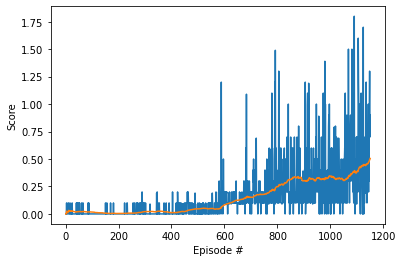

In [9]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.plot(np.arange(1, len(avg_score_list)+1), avg_score_list)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

In [30]:
agent = Agent(state_size, action_size, random_seed=8)

agent.actor_local = torch.jit.load('actor_local.pt')
agent.critic_local = torch.jit.load('critic_local.pt')